In [1]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

/Users/quyenlinhta/IASD/iasd/lib/python3.10/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [2]:
n = 70
x = np.arange(n, dtype=np.float64)

a = gauss(n, m=20, s=5)
b = gauss(n, m=30, s=10)

M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

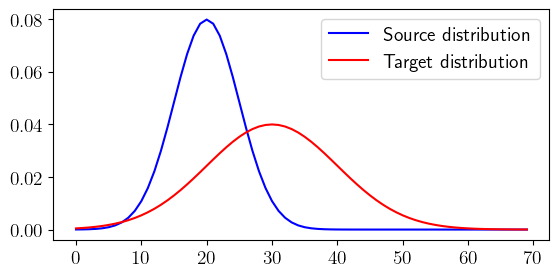

In [3]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

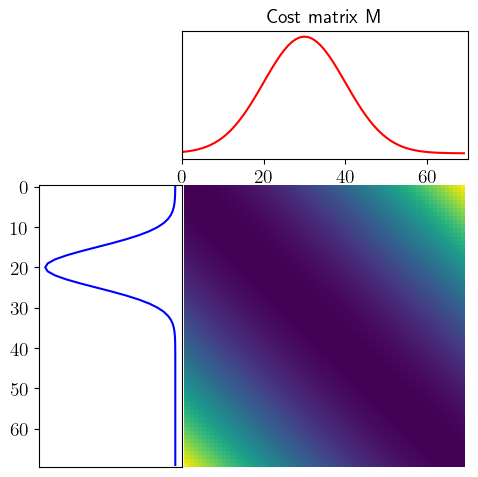

In [4]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

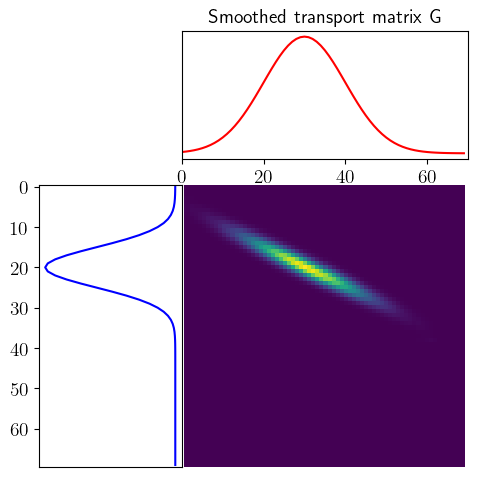

In [5]:
lambd = 2e-3
Gsm = ot.smooth.smooth_ot_dual(a, b, M, lambd, reg_type='kl')
pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gsm, 'Smoothed transport matrix G')
plt.show()

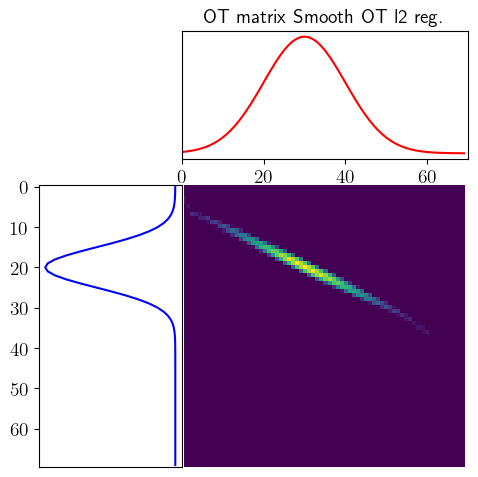

In [6]:
lambda_ = 1e-1
Gsm = ot.smooth.smooth_ot_dual(a, b, M, lambda_, reg_type='l2')
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gsm, 'OT matrix Smooth OT l2 reg.')
pl.show()

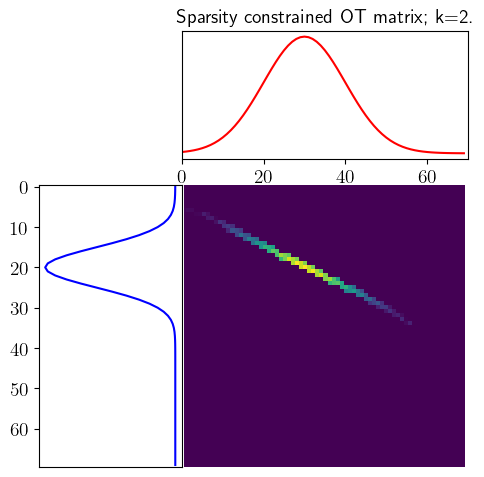

In [7]:
lambda_ = 1e-1
max_nz = 2
Gsc = ot.smooth.smooth_ot_dual(
    a, b, M, lambda_, reg_type='sparsity_constrained', max_nz=max_nz)
pl.figure(5, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gsc, 'Sparsity constrained OT matrix; k=2.')
pl.show()